In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
np.random.seed(42)

# Subplots

#### Create Subplots

In [16]:
# Generate Economic Data

size = 11
years = np.arange(2010, 2021)
gdp_growth = np.random.uniform(1, 5, size=size)
unemployment_rate = np.random.uniform(5, 10, size=size)
inflation_rate = np.random.uniform(1, 3, size=size)

# Create dataset
df = pd.DataFrame({
    'Year': years,
    'GDP Growth': gdp_growth,
    'Unemployment Rate': unemployment_rate,
    'Inflation Rate': inflation_rate,
})

In [13]:
df

,Year,GDP Growth,Unemployement Rate,Inflation Rate
0,2010,1.089722,6.049114,2.920714
1,2011,3.110027,9.086052,2.274112
2,2012,4.842091,7.553583,1.740686
3,2013,2.658629,8.370335,1.279425
4,2014,2.890527,6.318746,2.199347
5,2015,2.217507,5.976680,2.503975
6,2016,1.813973,7.337153,2.894551
7,2017,2.398673,7.773296,2.655998
8,2018,4.995475,9.381798,1.994342
9,2019,1.336467,5.226499,2.213002


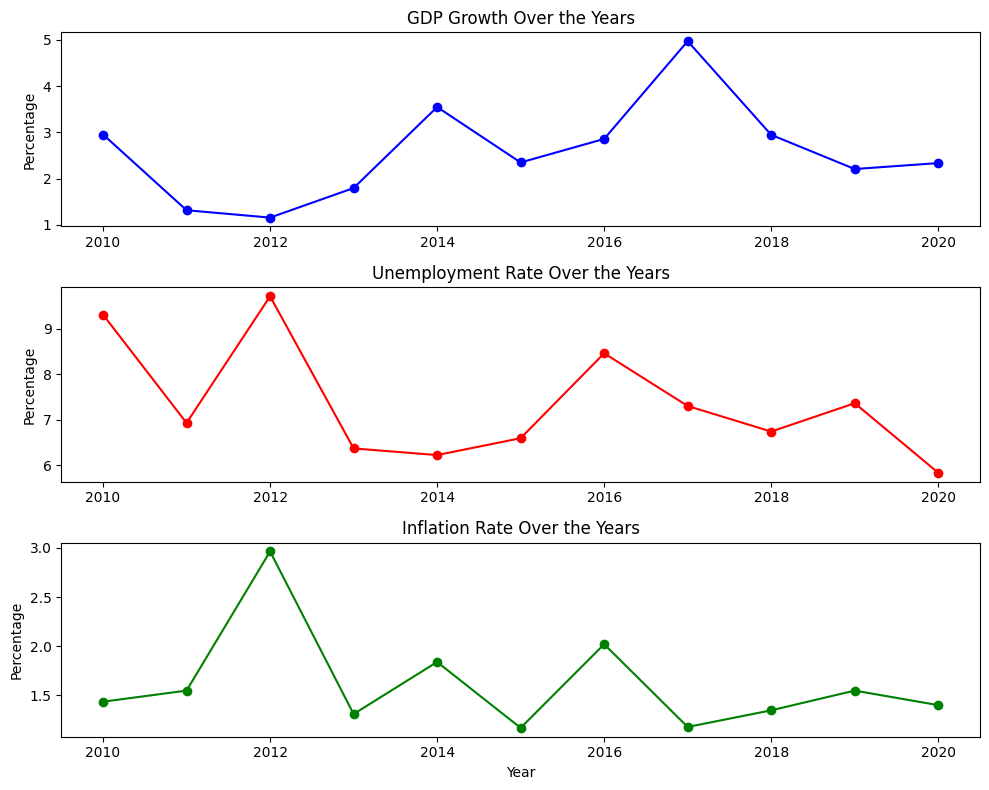

In [17]:
plt.figure(figsize=(10, 8))

# GDP subplot
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['GDP Growth'], marker='o', color='b')
plt.title('GDP Growth Over the Years')
plt.ylabel('Percentage')

# Unemployment Rate subplot
plt.subplot(3, 1, 2)
plt.plot(df['Year'], df['Unemployment Rate'], marker='o', color='r')
plt.title('Unemployment Rate Over the Years')
plt.ylabel('Percentage')

# Inflation Rate subplot
plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['Inflation Rate'], marker='o', color='g')
plt.title('Inflation Rate Over the Years')
plt.ylabel('Percentage')

plt.xlabel('Year')
plt.tight_layout()
plt.show()

# Why Data Visualization

### 1. Understanding Trends (Using Salse Data with Line Plot)

In [19]:
# Simulate sales data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
sales = np.random.randint(1000, 2000, size=6)

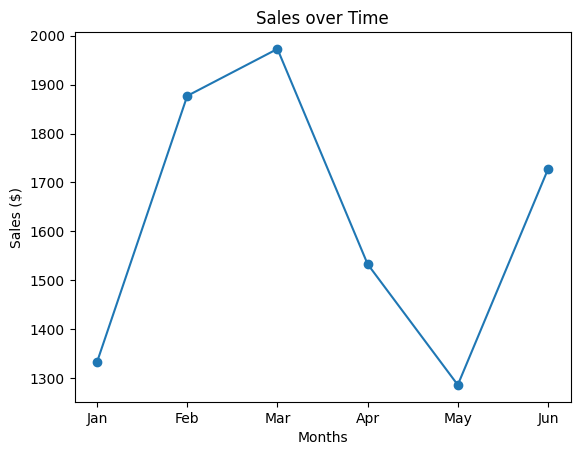

In [20]:
plt.plot(months, sales, marker='o')
plt.title('Sales over Time')
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.show()

### 2. Make complex data understandable (Using Product Preference with Bar Chart)

In [24]:
# Customer preferences over different products

products = ['A', 'B', 'C', 'D', 'E']
preferences = np.random.randint(50, 100, size=5)

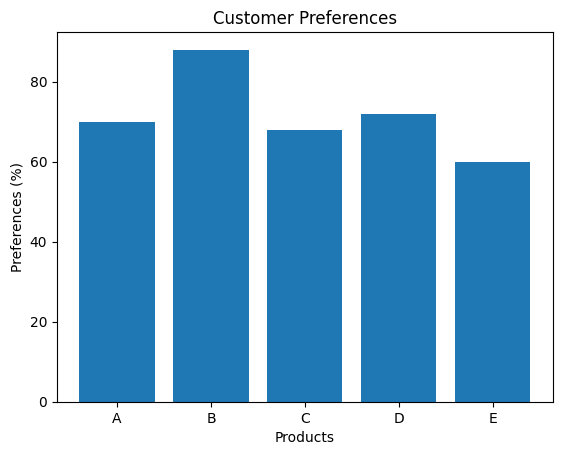

In [25]:
plt.bar(products, preferences)
plt.title('Customer Preferences')
plt.xlabel('Products')
plt.ylabel('Preferences (%)')
plt.show()

### 3. To Identify Outliers and Anomalies (With Scatter Plot)

In [136]:
x = np.random.rand(50)
y = np.random.rand(50)

x_outlier = [.9]
y_outlier = [.9]

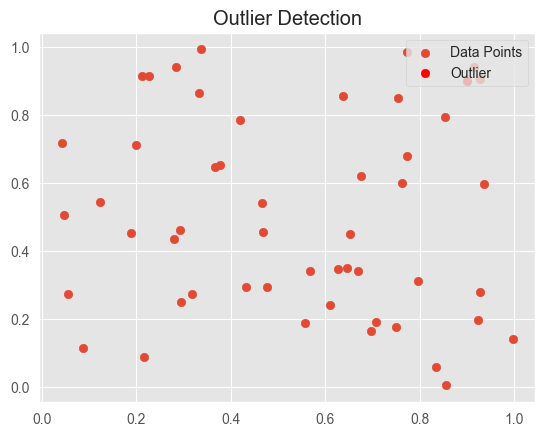

In [145]:
plt.scatter(x, y, label='Data Points')
plt.scatter(x_outlier, y_outlier, color='red', label='Outlier')
plt.title('Outlier Detection')
plt.legend(loc='upper right')
plt.show()

### 4. To tell a Story with Data. (Using Budget Allocation with Pie Chart)

In [42]:
# Tell the budget allocation story
labels = ['Rent', 'Utilities', 'Groceries', 'Savings', 'Entertainment']
sizes = np.random.uniform(10, 4, 5)
explode = (.1, 0, 0, 0,  0)

Text(0.5, 1.0, 'Monthly Budget Allocation')

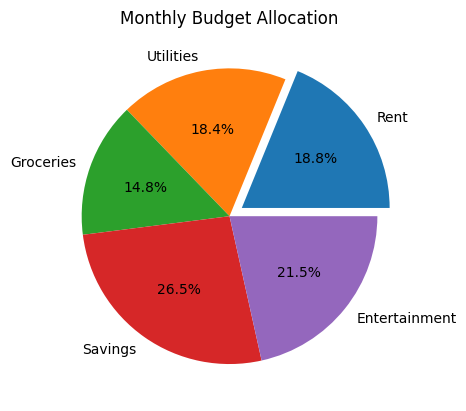

In [43]:
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Monthly Budget Allocation')

### 5. To support decision making (Using Sales Strategy with Bar Plot)

In [44]:
# Sales Strategy decision

strategies = ['A', 'B']
conversion_rate = [23, 19]

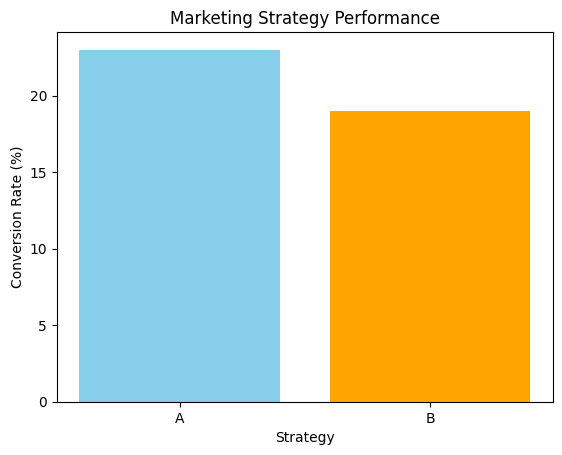

In [46]:
plt.bar(strategies, conversion_rate, color= ['skyblue', 'orange'])
plt.title('Marketing Strategy Performance')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Strategy')
plt.show()

# Anscombe's Quartet

In [112]:
anscombe_df = sns.load_dataset('anscombe')

In [116]:
anscombe_df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [117]:
anscombe_df[['x', 'y']].corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


In [126]:
summery_stats = anscombe_df.groupby('dataset').agg(
    mean_x = ('x', 'mean'),
    mean_y = ('y', 'mean'),
    var_x = ('x', 'var'),
    var_y = ('x', 'var'),
    corr_x = ('x', lambda x: anscombe_df[anscombe_df['dataset'] == x.name].corr().iloc[0, 0]),
    corr_y = ('y', lambda x: anscombe_df[anscombe_df['dataset'] == x.name].corr().iloc[0, 0]),
)

In [127]:
summery_stats

,mean_x,mean_y,var_x,var_y,corr_x,corr_y
dataset,,,,,,
I,9.0,7.500909,11.0,11.0,NaN,NaN
II,9.0,7.500909,11.0,11.0,NaN,NaN
III,9.0,7.500000,11.0,11.0,NaN,NaN
IV,9.0,7.500909,11.0,11.0,NaN,NaN


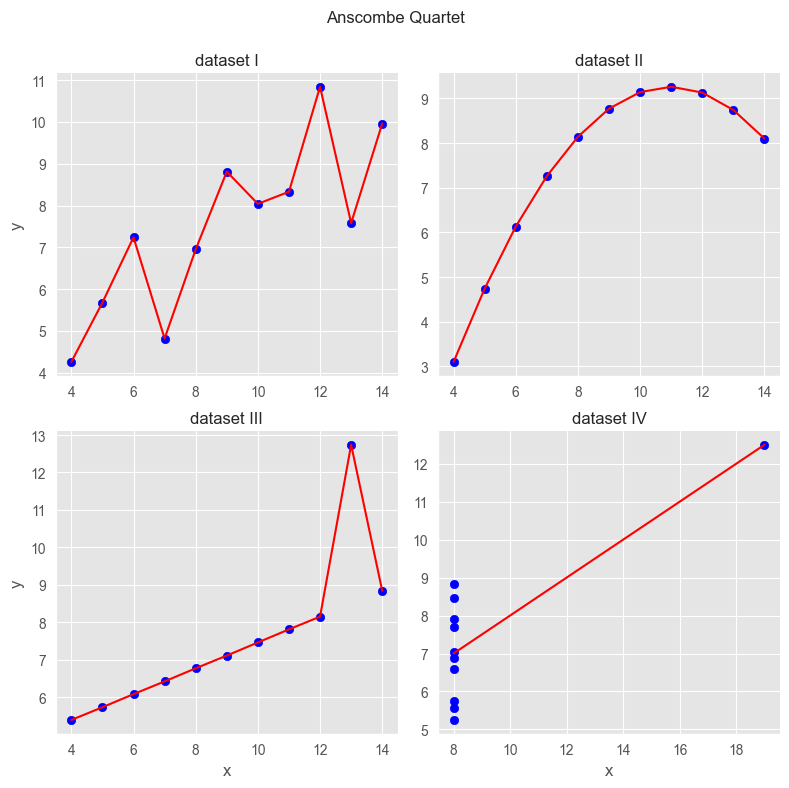

In [133]:
plt.style.use('ggplot')

grids = sns.FacetGrid(anscombe_df, col='dataset', col_wrap=2, height=4, sharex=False, sharey=False)
grids.map(plt.scatter, 'x', 'y', color='blue').set_titles('dataset {col_name}')
grids.map(sns.lineplot, 'x', 'y', color='red', errorbar=None)
plt.subplots_adjust(top=.9)
grids.fig.suptitle('Anscombe Quartet')
plt.show()